In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
display(train.head(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- missing value! Above the information, a lot of missing value

In [6]:
# target variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
missing = train.isnull().sum().sort_values(ascending = False)
missing.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

# Data Preprocessing

1. missing value

In [8]:
missing_percent = missing/1460
missing_percent_df = pd.DataFrame({'percent':missing_percent})
missing_percent_df.head(19)

,percent
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479


- First I drop missing value's percent greater than 0.6
- In my opinion, these missing values represent objects for which data imputation is not feasible.
- In addition,these features have a significant number of missing values. Therefore, dropping them is a great choice

In [9]:
train.drop(['PoolQC','MiscFeature','Alley','Fence'
            ,'MasVnrType'],axis = 1,inplace = True)
test.drop(['PoolQC','MiscFeature','Alley','Fence',
            'MasVnrType'],axis = 1,inplace = True)

2. Categorical_data and Numerical_data

In [10]:
categorical_data = [k for k in train.columns if train[k].dtype == 'object']
numerical_data = [y for y in train.columns if train[y].dtype != 'object']

> observe categorical_data

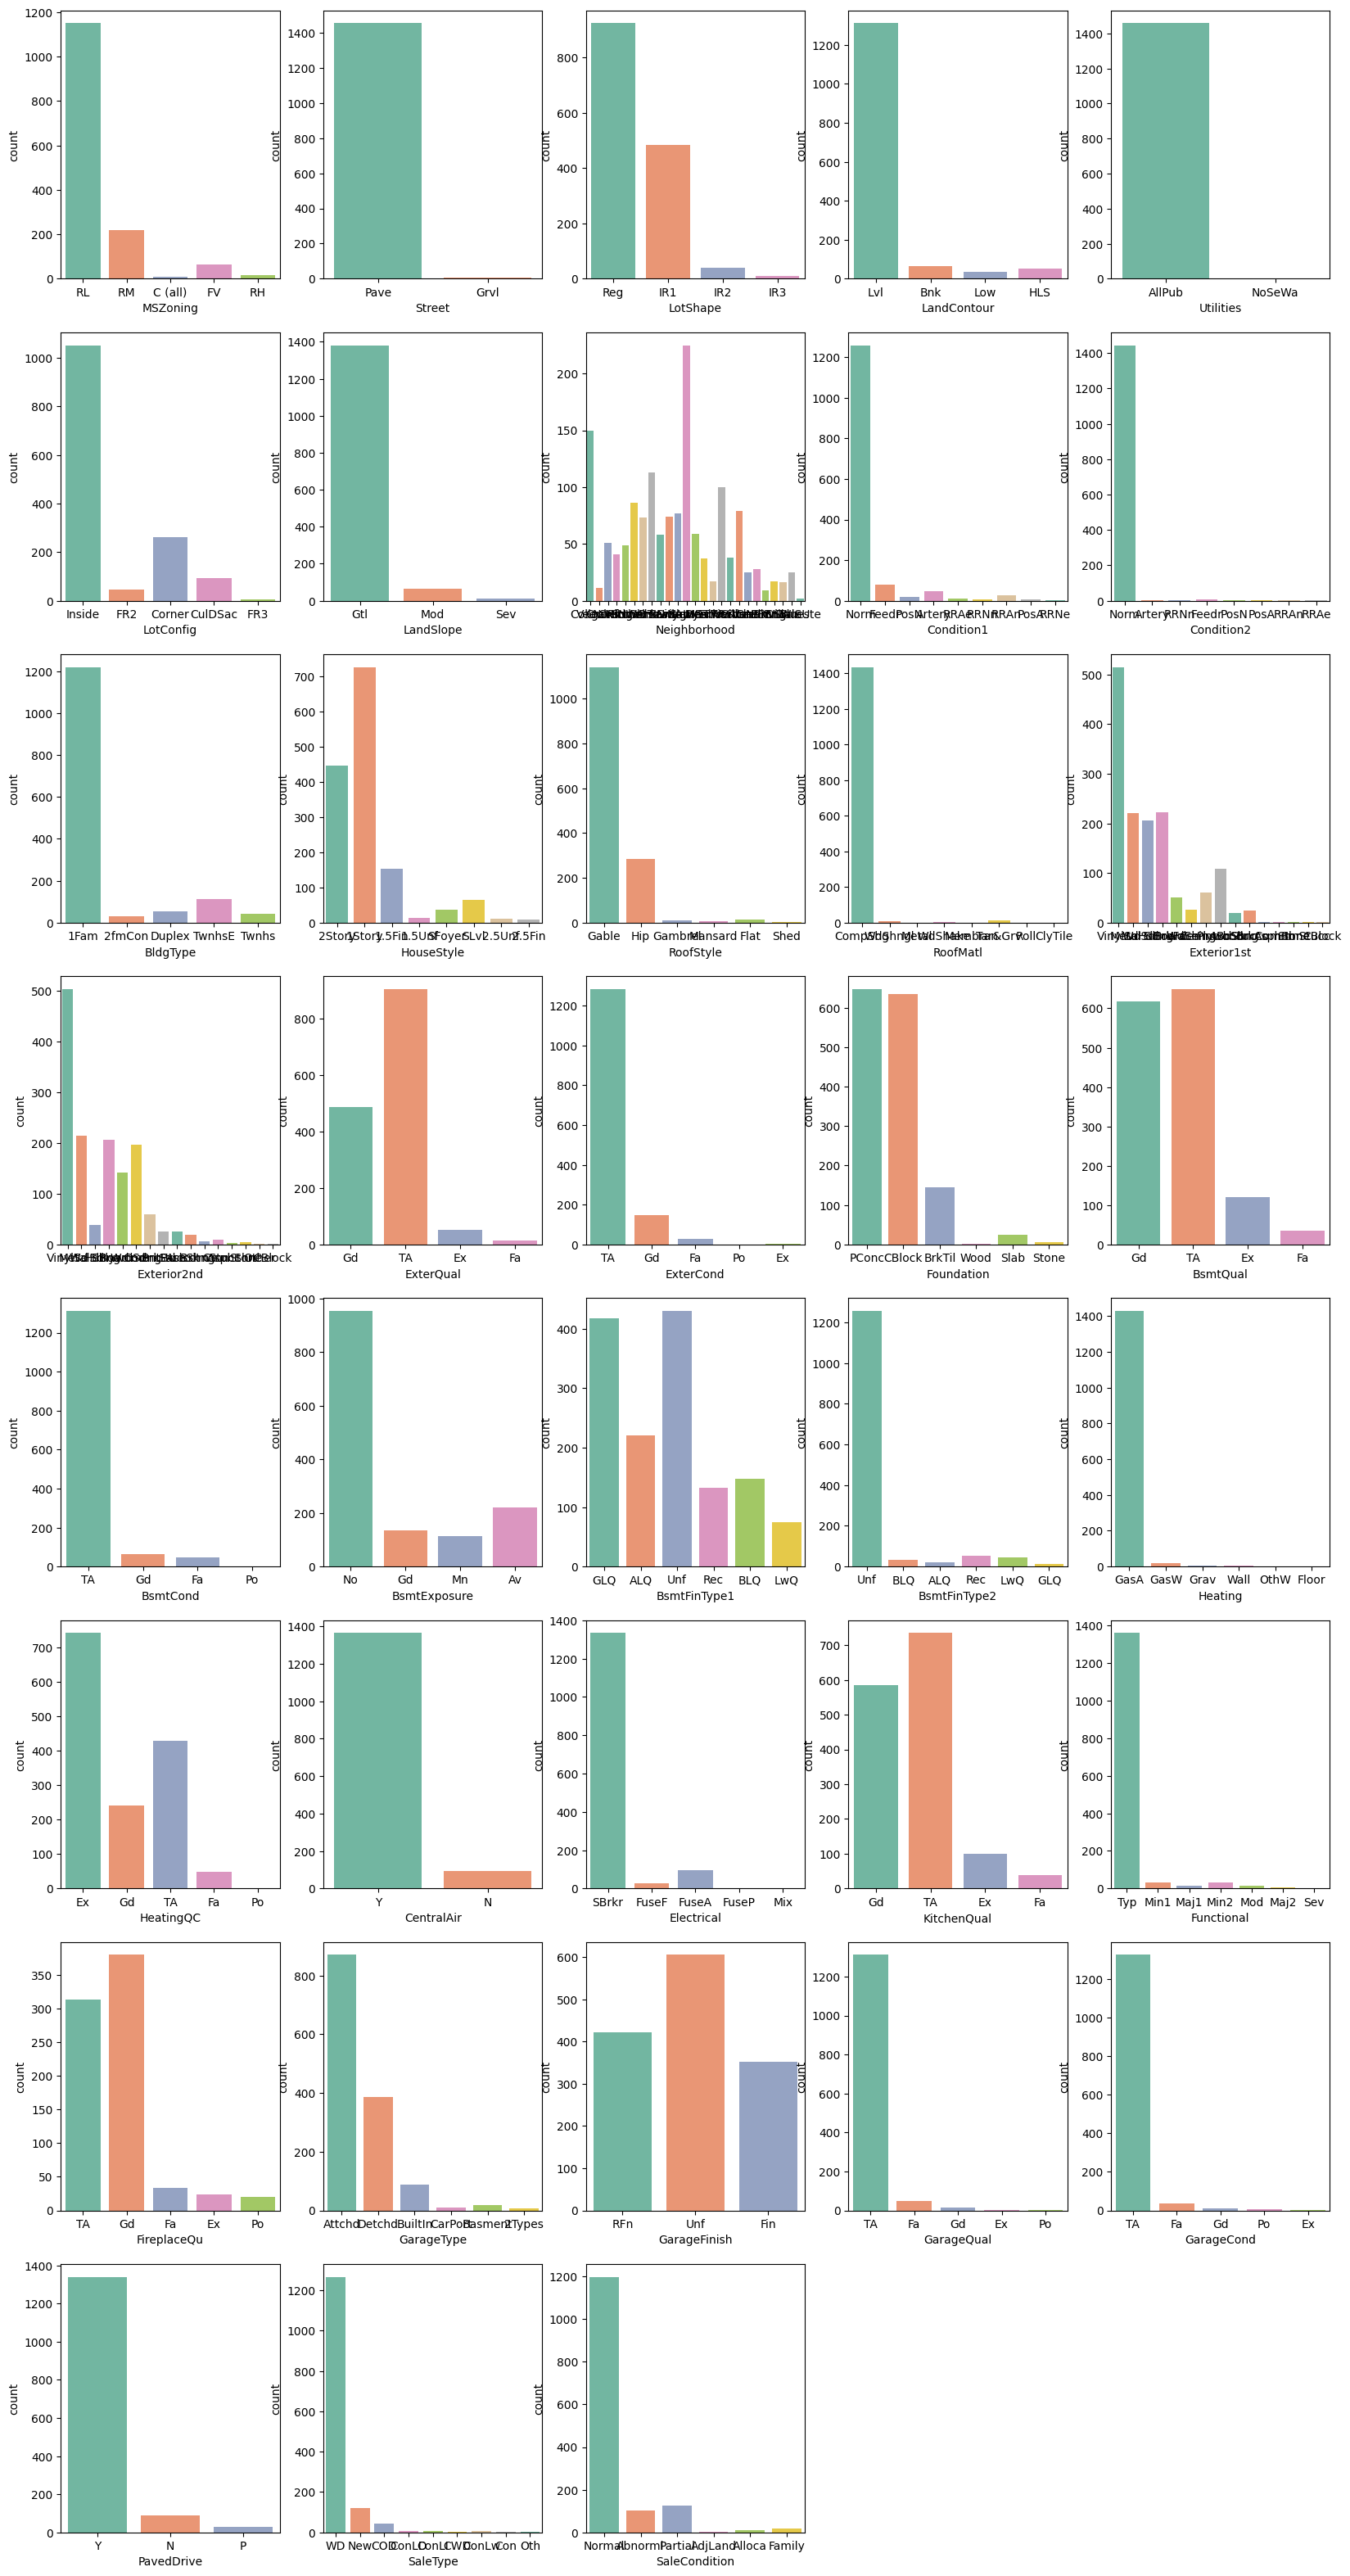

In [11]:
plt.figure(figsize = (20,40))
for i, columns in enumerate(categorical_data, start=1):
    plt.subplot(8,5,i)
    sns.countplot(x = columns , data = train , palette = 'Set2')
plt.show()

- Above information shows that some features are imbalanced. Only focus on specific value 
- Id is not a useful feature,so I drop it
> Therefore I drop that features only focus on specific value

In [12]:
train.drop(['Street','Utilities','LandContour','Condition1','Condition2',
           'LandSlope','BldgType','RoofMatl','ExterCond','BsmtCond','BsmtFinType2',
           'Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond',
           'SaleType','SaleCondition','Id'],axis = 1 ,inplace = True)
test.drop(['Street','Utilities','LandContour','Condition1','Condition2',
           'LandSlope','BldgType','RoofMatl','ExterCond','BsmtCond','BsmtFinType2',
           'Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond',
           'SaleType','SaleCondition','Id'],axis = 1 ,inplace = True)

> observe outlier

In [13]:
categorical_data = [k for k in train.columns if train[k].dtype == 'object']

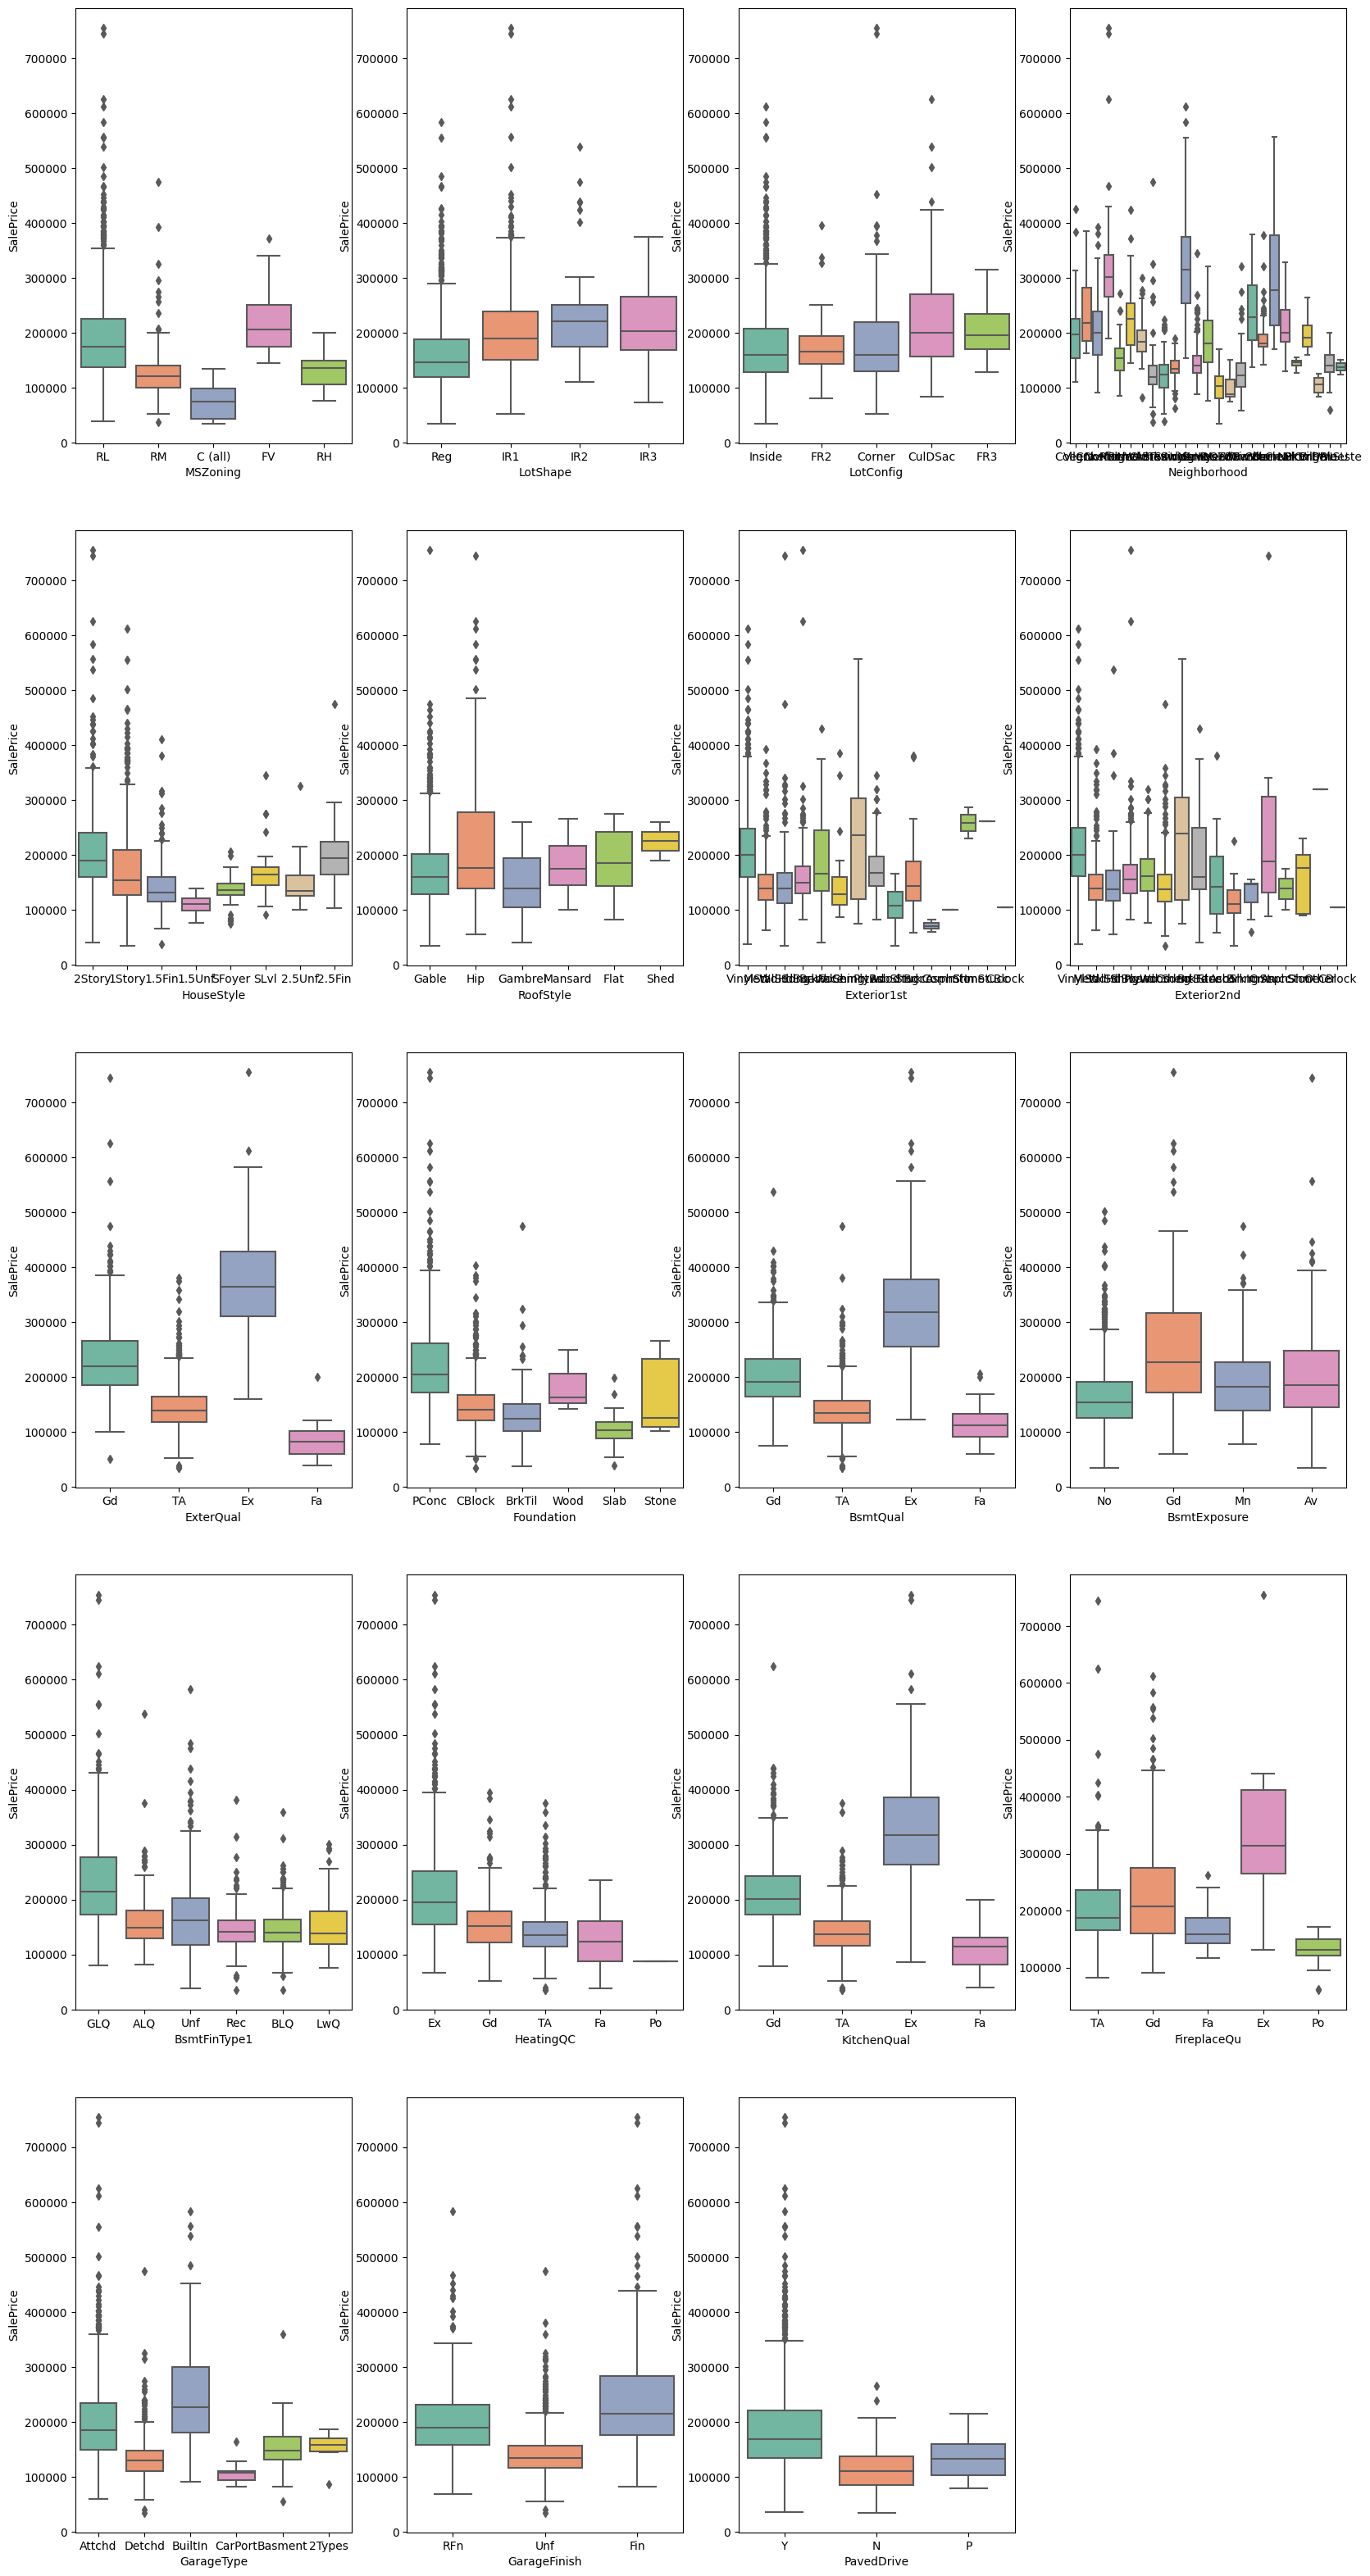

In [14]:
plt.figure(figsize = (20,40))
for i , columns in enumerate(categorical_data , start = 1):
    plt.subplot(5,4,i)
    sns.boxplot(x = columns ,y = 'SalePrice' ,data = train, palette = 'Set2')
plt.show()

> observe numerical data

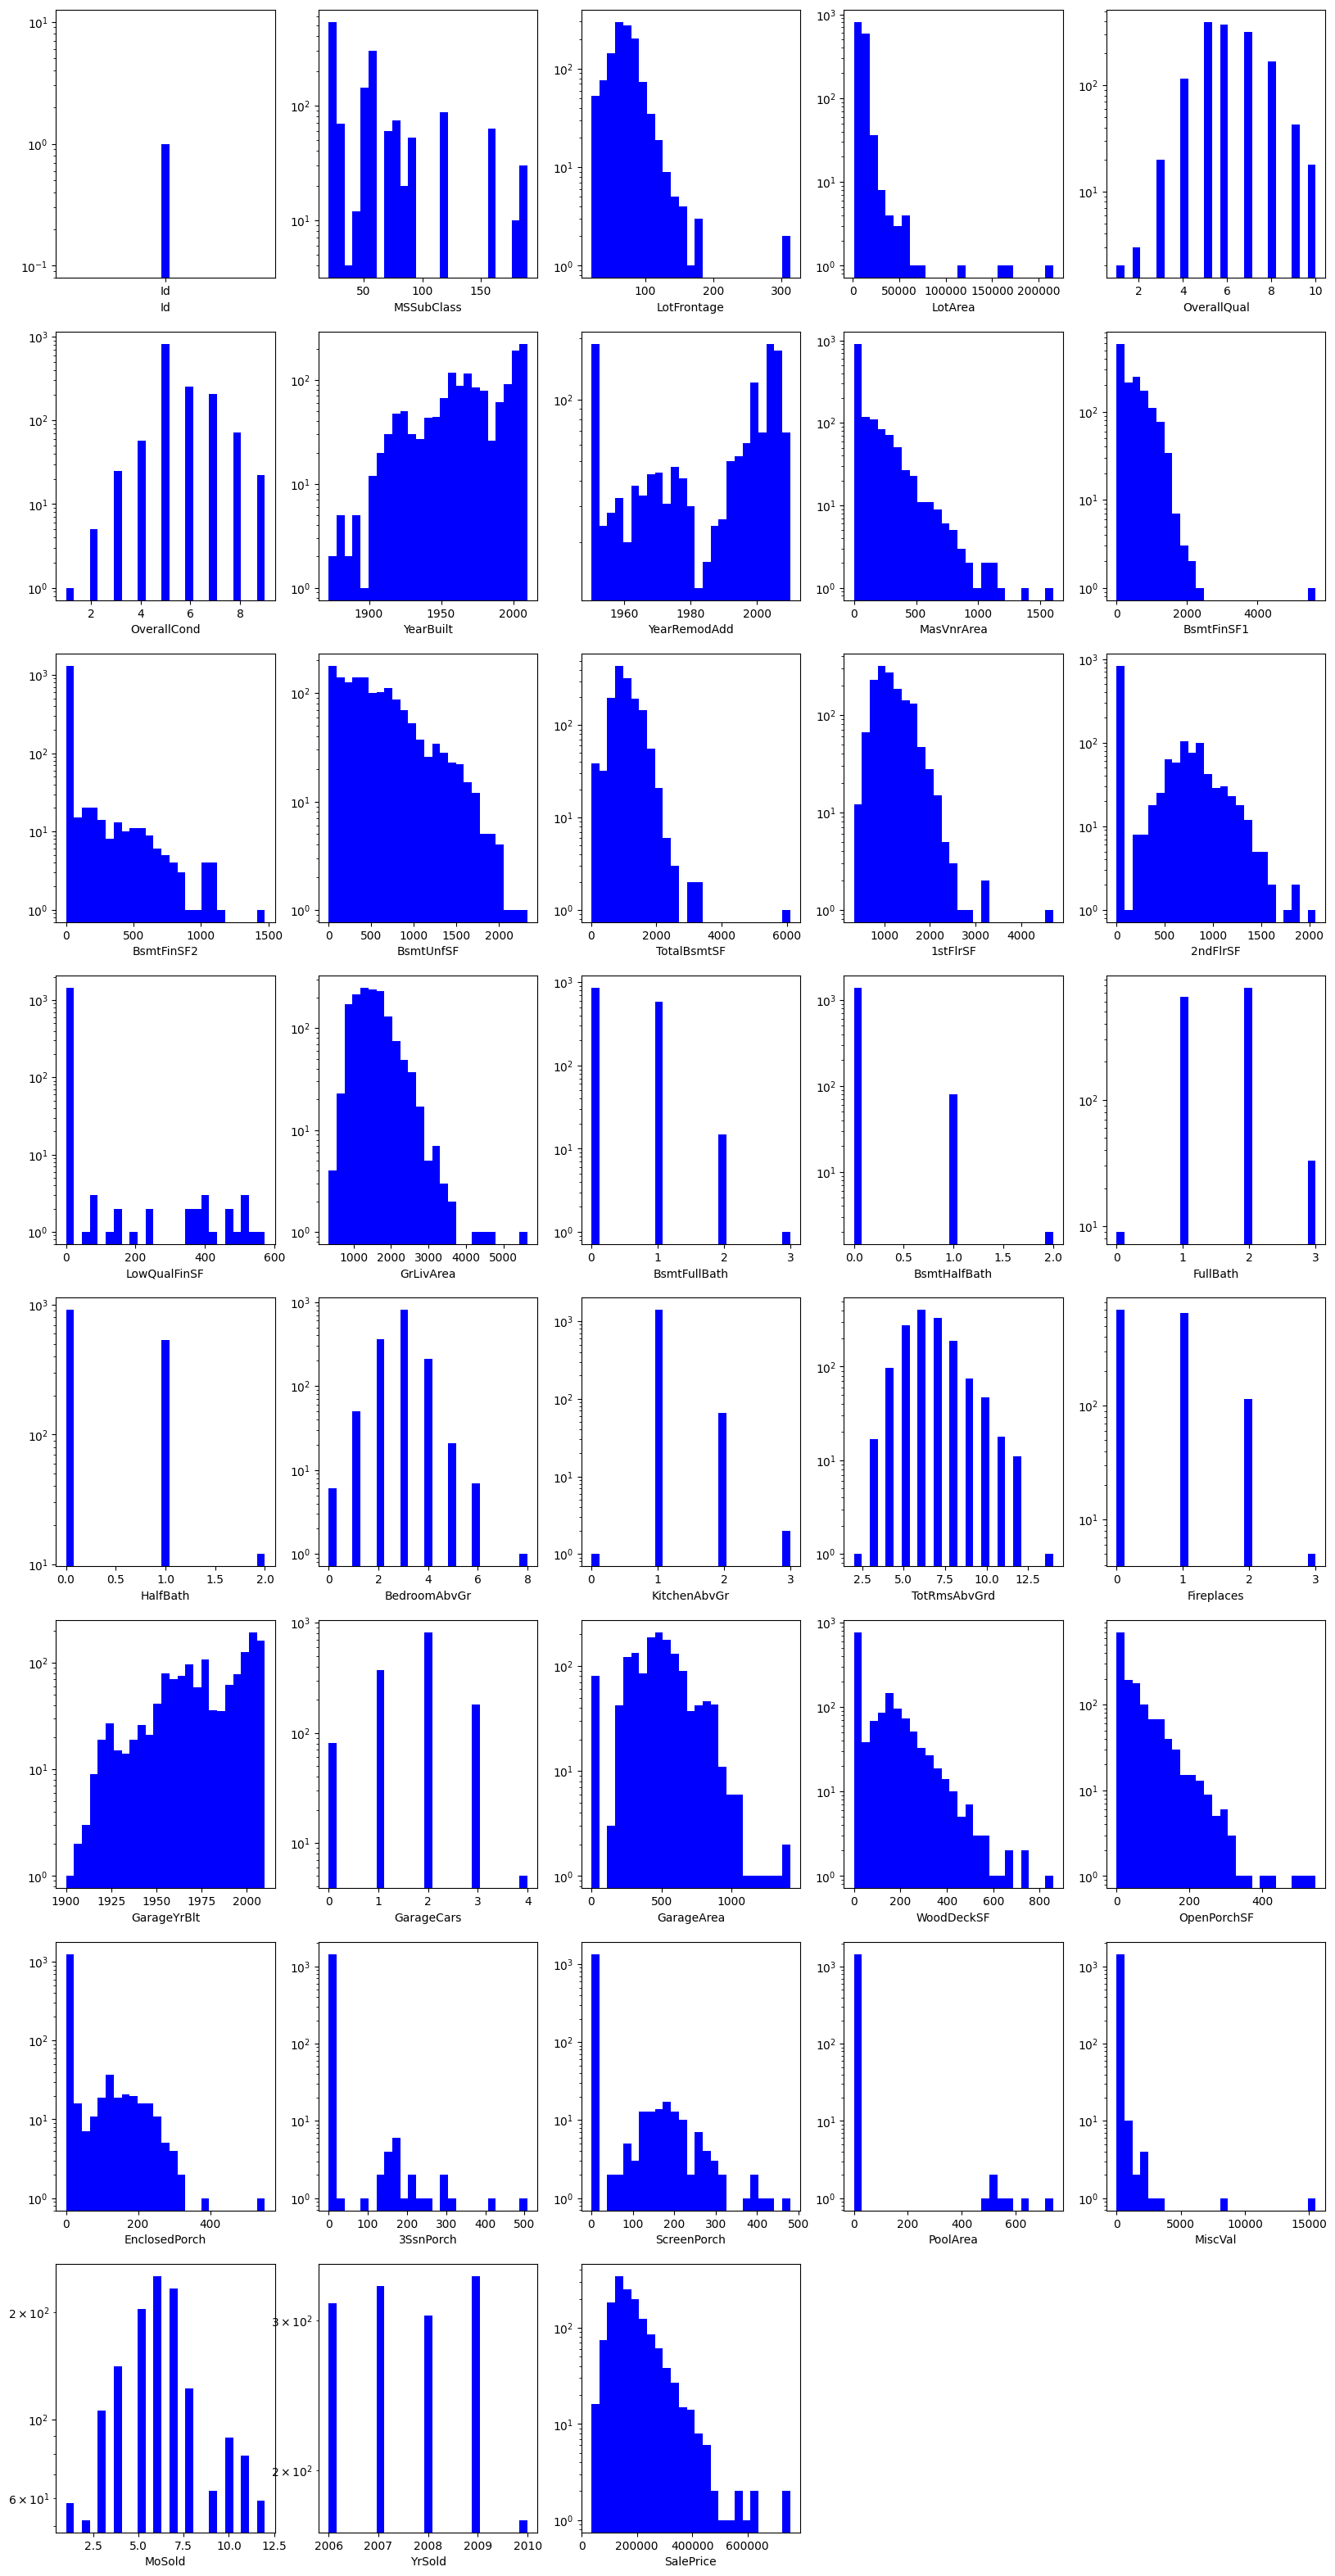

In [15]:
plt.figure(figsize = (20,40))
for i , columns in enumerate(numerical_data , start = 1):
    plt.subplot(8,5,i)
    plt.hist(x = columns ,bins = 25 , data = train ,color = 'blue')
    plt.xlabel(columns)
    plt.yscale('log')
plt.show()

- numerical data are also contained outliers
> Therefore drop those features that have seriously outliers

In [16]:
train.drop(['MSSubClass','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
           'MiscVal','BsmtHalfBath','KitchenAbvGr'] , axis = 1,inplace = True)
test.drop(['MSSubClass','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
           'MiscVal','BsmtHalfBath','KitchenAbvGr'] , axis = 1,inplace = True)

3. Dealing with outliers

- The values exceeding the upper bound will be replaced by the upper bound value,then the values smaller than lower bound will be replaced by the lower bound

In [17]:
def outliers_solution(data):
    data = data.copy()
    Q3 = data.quantile(0.75)
    Q1 = data.quantile(0.25)
    IQR = Q3 - Q1
    #outliers bound
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    for i , j in enumerate(data):
        if j>upper_bound:
            data[i]=upper_bound
        if j<lower_bound:
            data[i]=lower_bound
    return data

In [18]:
numerical_data = [y for y in train.columns if train[y].dtype != 'object']
outlier = []
for i in numerical_data:
    outliers_solution(train[i])

/tmp/ipykernel_18/2469677552.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=upper_bound
/tmp/ipykernel_18/2469677552.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1685.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=upper_bound
/tmp/ipykernel_18/2469677552.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2155.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=upper_bound
/tmp/ipykernel_18/2469677552.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of panda

In [19]:
missing = train.isnull().sum().sort_values(ascending = False)
missing.head()

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageFinish     81
GarageYrBlt      81
dtype: int64

4. label encoding for categorical data
> Why? If label encoding isn't used, correlation map couldn't present

In [20]:
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()
for i in categorical_data:
    train[i] = label_en.fit_transform(train[i])
    test[i] = label_en.fit_transform(test[i])

5. observe correlation map

<Axes: >

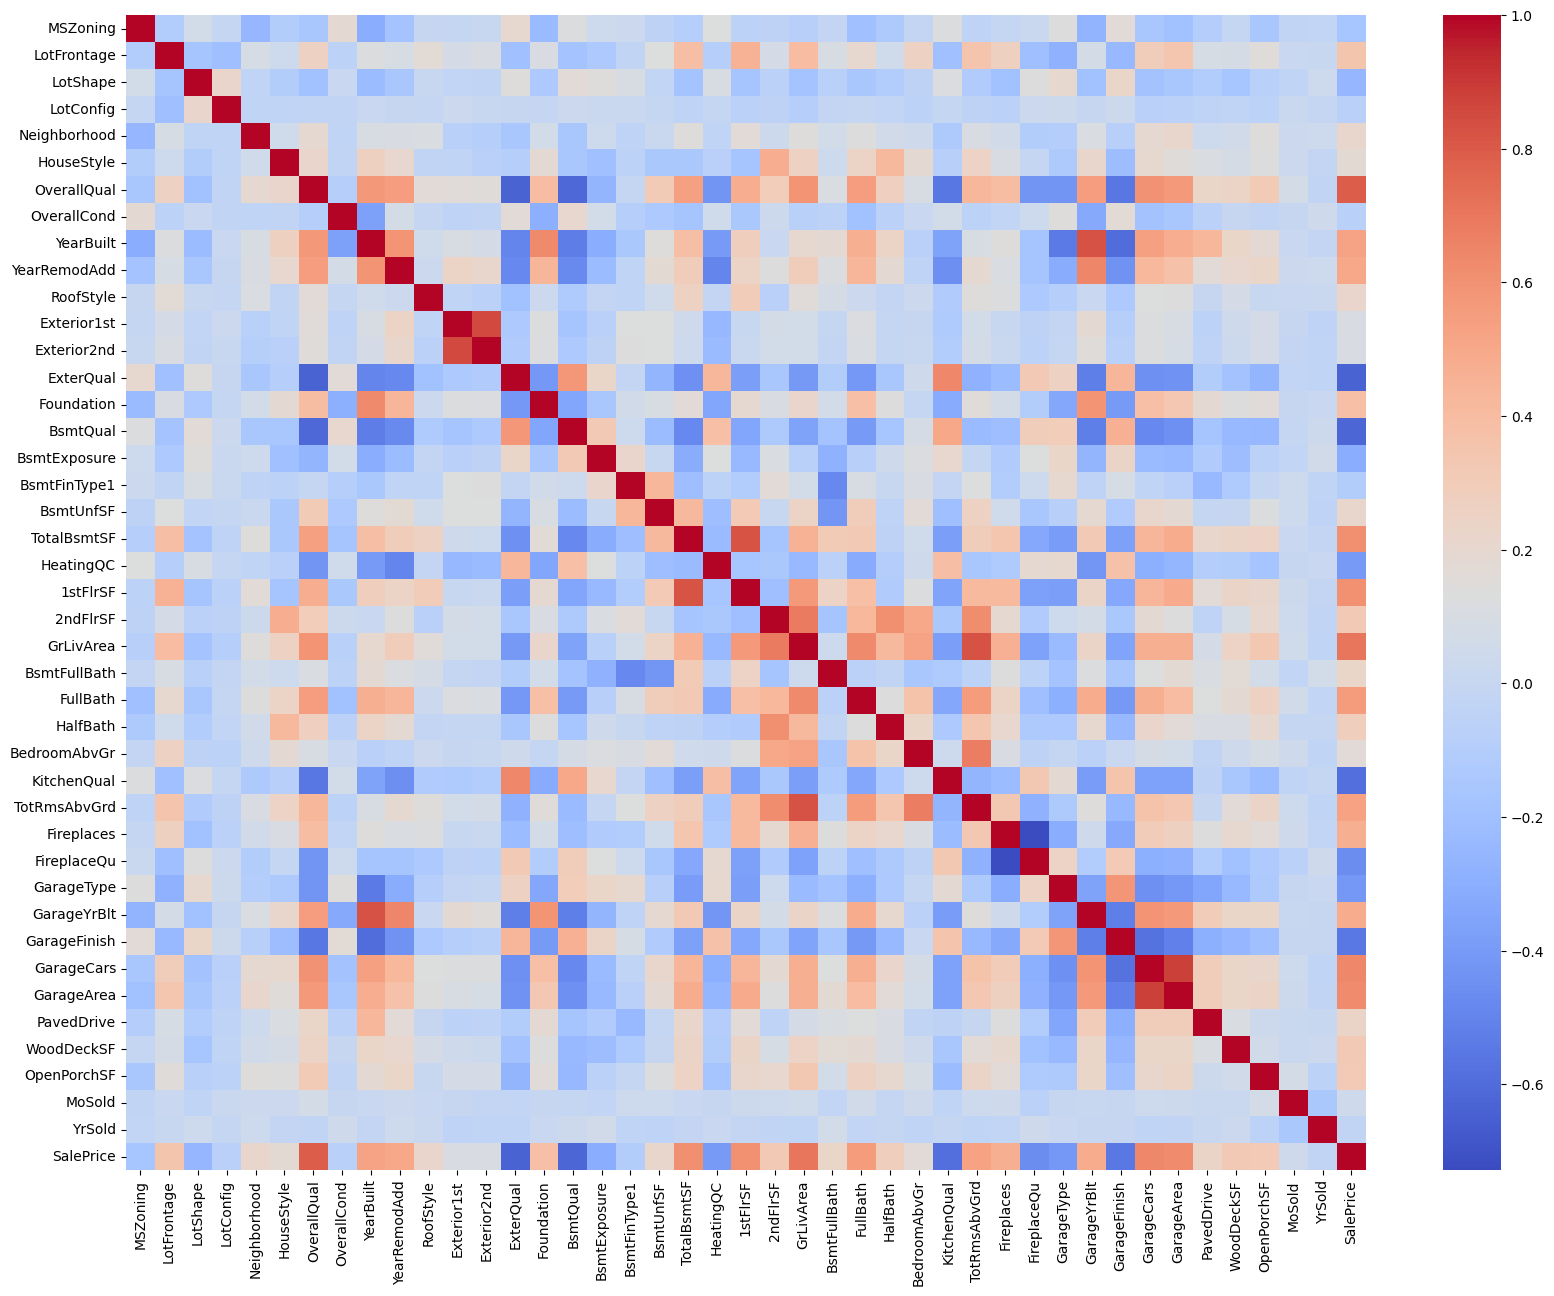

In [21]:
corrmap = train.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corrmap , cmap = 'coolwarm')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   LotShape      1460 non-null   int64  
 3   LotConfig     1460 non-null   int64  
 4   Neighborhood  1460 non-null   int64  
 5   HouseStyle    1460 non-null   int64  
 6   OverallQual   1460 non-null   int64  
 7   OverallCond   1460 non-null   int64  
 8   YearBuilt     1460 non-null   int64  
 9   YearRemodAdd  1460 non-null   int64  
 10  RoofStyle     1460 non-null   int64  
 11  Exterior1st   1460 non-null   int64  
 12  Exterior2nd   1460 non-null   int64  
 13  ExterQual     1460 non-null   int64  
 14  Foundation    1460 non-null   int64  
 15  BsmtQual      1460 non-null   int64  
 16  BsmtExposure  1460 non-null   int64  
 17  BsmtFinType1  1460 non-null   int64  
 18  BsmtUnfSF     1460 non-null 

In [23]:
X = train.drop(['SalePrice'],axis = 1)
Y = train['SalePrice']

In [24]:
# knn imputer
from sklearn.impute import KNNImputer
im = KNNImputer(n_neighbors = 5)
X = im.fit_transform(X)

In [25]:
test = im.transform(test)

# Model

1. train_test_split

In [26]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y, test_size = 0.2)

In [27]:
# X.columns

2. Standardization

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

3. XGBoost

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor 
xgb_model = XGBRegressor()
param_search={
    'n_estimators':[300,500,700],
    'max_depth':[1,3,5,7],
    'learning_rate':[0.05,0.01,0.1]
}
xgb_grid = GridSearchCV(xgb_model , param_search ,cv=5)
xgb_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.01, 0.1],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [300, 500, 700]})

In [30]:
print('Best:',xgb_grid.best_params_)
print('Score:',xgb_grid.best_score_)

Best: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Score: 0.874565417911483


In [31]:
from sklearn.metrics import r2_score
predict = xgb_grid.predict(x_test)
score = r2_score(y_test , predict)
print('Score:',score)

Score: 0.884191123577492


# Submit

In [32]:
submit = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
test_predict = xgb_grid.predict(test)
submit.SalePrice = test_predict
submit.to_csv('submission.csv', index = False)
submit.head()

,Id,SalePrice
0,1461,118003.976562
1,1462,149916.203125
2,1463,173675.218750
3,1464,196447.406250
4,1465,188279.187500
